In [14]:
import pandas as pd

In [15]:
url = 'http://www.seoul.go.kr/coronaV/coronaStatus.do'
url

'http://www.seoul.go.kr/coronaV/coronaStatus.do'

In [16]:
table = pd.read_html(url)
len(table)

4

In [17]:
table[0]

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구
0,131,112,243,232,201,328,325,480,204,332,497,379,278
1,+3,0,+8,+8,+8,+11,+21,+13,+2,+3,+9,+10,+9
2,마포구,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
3,303,331,636,282,125,325,415,566,503,544,648,295,706
4,+6,+9,+18,+2,0,+9,+14,+10,+13,+13,+23,+8,+32


In [18]:
table[3]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


In [19]:
import requests

In [20]:
url = "https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw=1"
url

'https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw=1'

In [21]:
url = url + "&order%5B0%5D%5Bdir%5D=desc&start=100&length=1000"
url

'https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw=1&order%5B0%5D%5Bdir%5D=desc&start=100&length=1000'

In [22]:
response = requests.get(url)
data_json = response.json()

In [23]:
records_total = data_json['recordsTotal']
records_total

9421

In [24]:
end_page = round(records_total / 100) + 1
end_page

95

In [25]:
data = data_json["data"]

In [26]:
pd.DataFrame(data).head()

,0,1,2,3,4,5,6
0,<p class='corona19_no'>9421</p>,35695,12.02.,중랑구,-,노원구 의료기관 관련,<b class=''></b>
1,<p class='corona19_no'>9420</p>,35335,12.02.,서대문구,-,기타 확진자 접촉,<b class=''></b>
2,<p class='corona19_no'>9419</p>,35658,12.02.,광진구,-,타시도 확진자 접촉,<b class=''></b>
3,<p class='corona19_no'>9418</p>,35667,12.02.,광진구,-,타시도 확진자 접촉,<b class=''></b>
4,<p class='corona19_no'>9417</p>,35665,12.02.,광진구,-,감염경로 조사중,<b class=''></b>


In [27]:
def get_seoul_covid19_100(page_no):
    """
    page_no : 입력값으로 페이지 번호를 입력하면 해당 번호의 데이터를 가져옴
    start_no : 입력받은 page_no로 
    """
    start_no = (page_no - 1) * 100
    url = f"https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw={page_no}"
    url = f"{url}&order%5B0%5D%5Bdir%5D=desc&start={start_no}&length=100"
    response = requests.get(url)
    data_json = response.json()
    return data_json

In [28]:
get_seoul_covid19_100(1000)

{'draw': 1000, 'recordsTotal': 9421, 'recordsFiltered': 9421, 'data': []}

In [29]:
!pip install tqdm

In [30]:
import time
from tqdm import trange

In [31]:
page_list = []

all_page = 3

for page_no in trange(all_page + 1):
    one_page = get_seoul_covid19_100(page_no)
    one_page = pd.DataFrame(one_page["data"])
    page_list.append(one_page)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.09it/s]


In [32]:
def get_multi_page_list(start_page, end_page):
    # 데이터가 제대로 로드 되는지 앞부분 3페이지 정도만 확인하고 전체페이지를 가져오록 합니다.
    # all_page = 3
    for page_no in trange(start_page, end_page + 1):
        one_page = get_seoul_covid19_100(page_no)
        one_page = pd.DataFrame(one_page["data"])
        page_list.append(one_page)
        # 서버에 한번에 너무 많은요청을 보내면 서버에 부담이 됩니다.
        # 서버에 부담을 주지 않기 위애 0.5초씩 쉬었다 가져옵니다.
        time.sleep(0.5)
    return page_list

In [33]:
start_page = 1
page_list = []
page_list = get_multi_page_list(start_page, end_page)
page_list

100%|██████████████████████████████████████████████████████████████████████████████████| 95/95 [01:25<00:00,  1.12it/s]


[                                  0      1       2     3  4            5  \
 0   <p class='corona19_no'>9421</p>  35695  12.02.   중랑구  -  노원구 의료기관 관련   
 1   <p class='corona19_no'>9420</p>  35335  12.02.  서대문구  -    기타 확진자 접촉   
 2   <p class='corona19_no'>9419</p>  35658  12.02.   광진구  -   타시도 확진자 접촉   
 3   <p class='corona19_no'>9418</p>  35667  12.02.   광진구  -   타시도 확진자 접촉   
 4   <p class='corona19_no'>9417</p>  35665  12.02.   광진구  -     감염경로 조사중   
 ..                              ...    ...     ...   ... ..          ...   
 95  <p class='corona19_no'>9326</p>  35477  12.02.   성북구  -  고려대학교 밴드동아리   
 96  <p class='corona19_no'>9325</p>  35479  12.02.   성북구  -    기타 확진자 접촉   
 97  <p class='corona19_no'>9324</p>  35476  12.02.   성북구  -     감염경로 조사중   
 98  <p class='corona19_no'>9323</p>  35471  12.02.   성북구  -  노원구 의료기관 관련   
 99  <p class='corona19_no'>9322</p>  35579  12.02.   중랑구  -     감염경로 조사중   
 
                    6  
 0   <b class=''></b>  
 1   <b class=''></b>  
 2

In [34]:
df_all = pd.concat(page_list)
df_all.shape

(9421, 7)

In [35]:
df_all.head()

,0,1,2,3,4,5,6
0,<p class='corona19_no'>9421</p>,35695,12.02.,중랑구,-,노원구 의료기관 관련,<b class=''></b>
1,<p class='corona19_no'>9420</p>,35335,12.02.,서대문구,-,기타 확진자 접촉,<b class=''></b>
2,<p class='corona19_no'>9419</p>,35658,12.02.,광진구,-,타시도 확진자 접촉,<b class=''></b>
3,<p class='corona19_no'>9418</p>,35667,12.02.,광진구,-,타시도 확진자 접촉,<b class=''></b>
4,<p class='corona19_no'>9417</p>,35665,12.02.,광진구,-,감염경로 조사중,<b class=''></b>


In [36]:
df = table[3]
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


In [37]:
cols = df.columns.tolist()
cols

['연번', '환자', '확진일', '거주지', '여행력', '접촉력', '퇴원현황']

In [38]:
df_all.columns = cols

In [39]:
df_all.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,<p class='corona19_no'>9421</p>,35695,12.02.,중랑구,-,노원구 의료기관 관련,<b class=''></b>
1,<p class='corona19_no'>9420</p>,35335,12.02.,서대문구,-,기타 확진자 접촉,<b class=''></b>
2,<p class='corona19_no'>9419</p>,35658,12.02.,광진구,-,타시도 확진자 접촉,<b class=''></b>
3,<p class='corona19_no'>9418</p>,35667,12.02.,광진구,-,타시도 확진자 접촉,<b class=''></b>
4,<p class='corona19_no'>9417</p>,35665,12.02.,광진구,-,감염경로 조사중,<b class=''></b>


In [40]:
import re
def extract_number(num_string):
    num = re.sub("[^0-9]", "", num_string)
    num = int(num)
    return num

In [41]:
num_string = "<p class='corona19_no'>7625</p>"
extract_number(num_string)

197625

In [42]:
df_all["연번"] = df_all["연번"].map(extract_number)

In [43]:
def extract_hangeul(origin_text):
    subtract_text = re.sub("[^가-힣]", "", origin_text)
    return subtract_text

In [44]:
extract_hangeul("<b class='status1'>퇴원</b>")

'퇴원'

In [45]:
extract_hangeul("<b class='status2'>사망</b>")

'사망'

In [46]:
extract_hangeul("<b class=''></b>")

''

In [47]:
df_all["퇴원현황"].value_counts()

<b class='status1'>퇴원</b>    6719
<b class=''></b>             1649
<b class='status1'></b>       834
<b class='status2'></b>       124
<b class='status2'>사망</b>      95
Name: 퇴원현황, dtype: int64

In [48]:
df_all.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,199421,35695,12.02.,중랑구,-,노원구 의료기관 관련,<b class=''></b>
1,199420,35335,12.02.,서대문구,-,기타 확진자 접촉,<b class=''></b>
2,199419,35658,12.02.,광진구,-,타시도 확진자 접촉,<b class=''></b>
3,199418,35667,12.02.,광진구,-,타시도 확진자 접촉,<b class=''></b>
4,199417,35665,12.02.,광진구,-,감염경로 조사중,<b class=''></b>


In [49]:
df_all.loc[df_all['퇴원현황'].str.contains('퇴원'), '퇴원현황'] = '퇴원'
df_all.loc[df_all['퇴원현황'].str.contains('사망'), '퇴원형황'] = '사망'
df_all.loc[~df_all['퇴원현황'].str.contains('퇴원|사망'), '퇴원현황'] = ''
df_all['퇴원현황'].value_counts()

퇴원                           6719
                             2607
<b class='status2'>사망</b>      95
Name: 퇴원현황, dtype: int64

In [50]:
last_day = df_all.iloc[0]['확진일']
last_day

'12.02.'

In [51]:
date = last_day.replace('.', '_')
date

'12_02_'

In [52]:
file_name = f'seoul-covid19-{date}.csv'
file_name

'seoul-covid19-12_02_.csv'

In [53]:
df_all.to_csv(file_name, index=False)

In [54]:
df = pd.read_csv(file_name)
df.shape

(9421, 8)

In [55]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황
0,199421,35695,12.02.,중랑구,-,노원구 의료기관 관련,NaN,NaN
1,199420,35335,12.02.,서대문구,-,기타 확진자 접촉,NaN,NaN
2,199419,35658,12.02.,광진구,-,타시도 확진자 접촉,NaN,NaN
3,199418,35667,12.02.,광진구,-,타시도 확진자 접촉,NaN,NaN
4,199417,35665,12.02.,광진구,-,감염경로 조사중,NaN,NaN


In [56]:
df['확진일'].value_counts()

12.02.    262
11.25.    212
11.26.    204
12.01.    193
11.27.    178
         ... 
4.20.       1
2.7.        1
4.19.       1
4.30.       1
4.15.       1
Name: 확진일, Length: 287, dtype: int64

In [57]:
df['확진일자'] = pd.to_datetime('2020-'+ df['확진일'].str.replace('.', '-'))

In [58]:
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자
0,199421,35695,12.02.,중랑구,-,노원구 의료기관 관련,NaN,NaN,2020-12-02
1,199420,35335,12.02.,서대문구,-,기타 확진자 접촉,NaN,NaN,2020-12-02
2,199419,35658,12.02.,광진구,-,타시도 확진자 접촉,NaN,NaN,2020-12-02
3,199418,35667,12.02.,광진구,-,타시도 확진자 접촉,NaN,NaN,2020-12-02
4,199417,35665,12.02.,광진구,-,감염경로 조사중,NaN,NaN,2020-12-02
...,...,...,...,...,...,...,...,...,...
9416,195,9,1.31.,성북구,-,#5 접촉,퇴원,NaN,2020-01-31
9417,194,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,NaN,2020-01-30
9418,193,6,1.30.,종로구,-,#3 접촉,퇴원,NaN,2020-01-30
9419,192,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,NaN,2020-01-30


In [59]:
df['월'] = df['확진일자'].dt.month
df['주'] = df['확진일자'].dt.week
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주
0,199421,35695,12.02.,중랑구,-,노원구 의료기관 관련,NaN,NaN,2020-12-02,12,49
1,199420,35335,12.02.,서대문구,-,기타 확진자 접촉,NaN,NaN,2020-12-02,12,49
2,199419,35658,12.02.,광진구,-,타시도 확진자 접촉,NaN,NaN,2020-12-02,12,49
3,199418,35667,12.02.,광진구,-,타시도 확진자 접촉,NaN,NaN,2020-12-02,12,49
4,199417,35665,12.02.,광진구,-,감염경로 조사중,NaN,NaN,2020-12-02,12,49


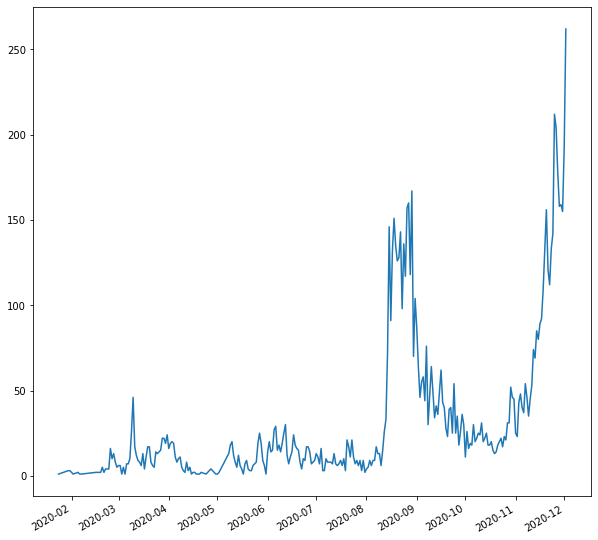

In [60]:
df['확진일자'].value_counts().plot(figsize=(10,10))

In [61]:
df['월일'] = df['확진일자'].astype(str).map(lambda x: x[-5:])

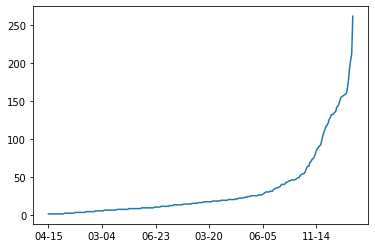

In [62]:
df['월일'].value_counts().sort_values().plot()

In [63]:
day_count = df['월일'].value_counts().sort_index()
day_count

01-24      1
01-30      3
01-31      3
02-02      1
02-05      2
        ... 
11-28    158
11-29    159
11-30    155
12-01    193
12-02    262
Name: 월일, Length: 285, dtype: int64

In [64]:
df['월일'].describe()

count      9421
unique      285
top       12-02
freq        262
Name: 월일, dtype: object

In [65]:
day_count.describe()

count    285.000000
mean      33.056140
std       44.920395
min        1.000000
25%        7.000000
50%       16.000000
75%       35.000000
max      262.000000
Name: 월일, dtype: float64

In [66]:
df[df['월일'] == '11-25']['거주지'].value_counts()

강서구     58
타시도     16
노원구     16
송파구     16
양천구     12
강남구     11
서초구      8
성동구      7
중랑구      7
성북구      7
강북구      5
구로구      5
강동구      5
동대문구     5
도봉구      5
마포구      5
동작구      5
은평구      4
용산구      4
영등포구     3
서대문구     2
광진구      2
기타       1
금천구      1
종로구      1
관악구      1
Name: 거주지, dtype: int64

In [67]:
import matplotlib.pyplot as plt

In [68]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

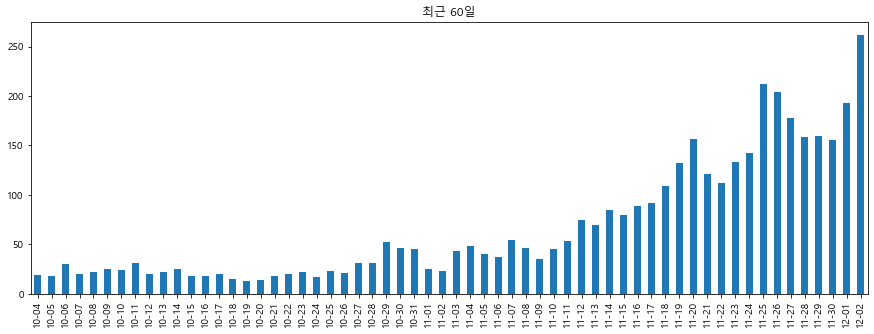

In [69]:
day_count[-60:].plot.bar(figsize=(15,5), title= '최근 60일')

In [70]:
df.head(1)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주,월일
0,199421,35695,12.02.,중랑구,-,노원구 의료기관 관련,NaN,NaN,2020-12-02,12,49,12-02


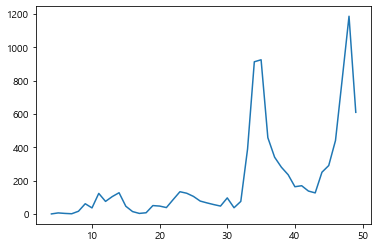

In [71]:
week_count = df['주'].value_counts().sort_index()
week_count.plot()

In [72]:
week_count_median = week_count.median()
week_count_mean = week_count.mean()
week_count_median, week_count_mean

(101.0, 204.80434782608697)

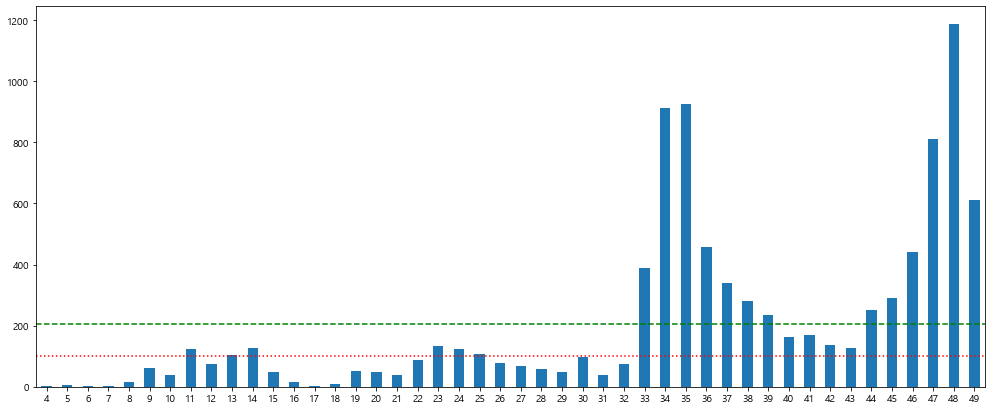

In [73]:
week_count.plot.bar(figsize=(17,7), rot=0)
plt.axhline(week_count_median, color='r', linestyle=':')
plt.axhline(week_count_mean, color='g', linestyle='--')

In [74]:
month_week_count = df.groupby(['월','주'])['연번'].count()

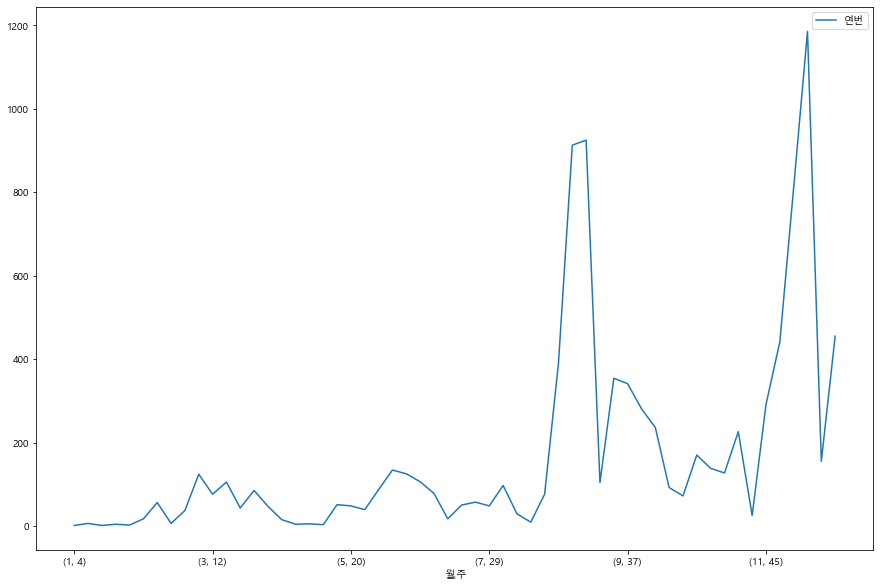

In [75]:
pd.DataFrame(month_week_count).plot(figsize=(15,10))

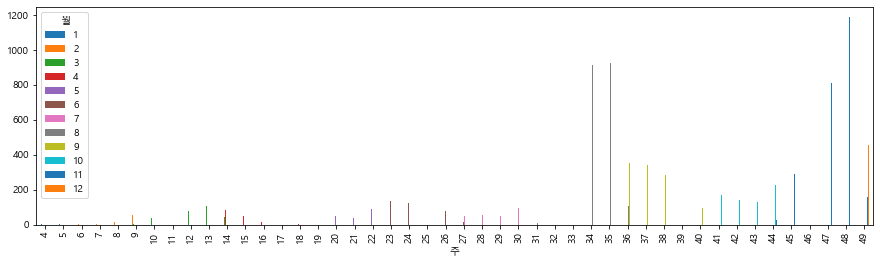

In [76]:
month_week_count.unstack().T.plot.bar(figsize=(15, 4))

In [77]:
day_count = df['확진일자'].value_counts().sort_index()

In [78]:
first_day = day_count.index[0]
last_day = day_count.index[-1]
first_day, last_day

(Timestamp('2020-01-24 00:00:00'), Timestamp('2020-12-02 00:00:00'))

In [79]:
days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-26',
               '2020-11-27', '2020-11-28', '2020-11-29', '2020-11-30',
               '2020-12-01', '2020-12-02'],
              dtype='datetime64[ns]', length=314, freq='D')

In [80]:
df_days = pd.DataFrame({"연월일": days})
df_days.head()

,연월일
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [81]:
day_count = df["확진일자"].value_counts().sort_index()
day_count.head()

2020-01-24    1
2020-01-30    3
2020-01-31    3
2020-02-02    1
2020-02-05    2
Name: 확진일자, dtype: int64

In [82]:
df_day_count = day_count.reset_index()

In [83]:
df_day_count.columns = ["확진일자", "확진수"]
df_day_count.head(3)

,확진일자,확진수
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3


In [84]:
df_all_days = df_days.merge(df_day_count, 
                            left_on="연월일", 
                            right_on="확진일자", 
                            how="left")
df_all_days = df_all_days[["연월일", "확진수"]]
df_all_days.head()

,연월일,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN


In [85]:
df_all_days["확진수"] = df_all_days["확진수"].fillna(0).astype(int)
df_all_days.head(3)

,연월일,확진수
0,2020-01-24,1
1,2020-01-25,0
2,2020-01-26,0


In [86]:
df_all_days["일자"] = df_all_days["연월일"].astype(str).map(lambda x : x[-5:])
df_all_days

,연월일,확진수,일자
0,2020-01-24,1,01-24
1,2020-01-25,0,01-25
2,2020-01-26,0,01-26
3,2020-01-27,0,01-27
4,2020-01-28,0,01-28
...,...,...,...
309,2020-11-28,158,11-28
310,2020-11-29,159,11-29
311,2020-11-30,155,11-30
312,2020-12-01,193,12-01


In [87]:
df_all_days["누적확진"] = df_all_days["확진수"].cumsum()
df_all_days[["확진수", "누적확진"]].head(10)

,확진수,누적확진
0,1,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,3,4
7,3,7
8,0,7
9,1,8


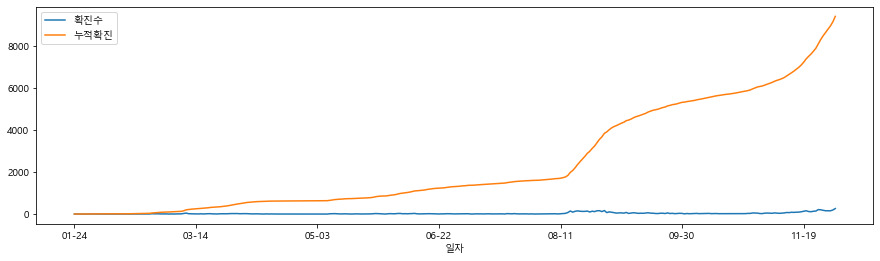

In [88]:
df_g = df_all_days[['일자','확진수','누적확진' ]]
df_g = df_g.set_index("일자")
df_g.plot(figsize=(15, 4))

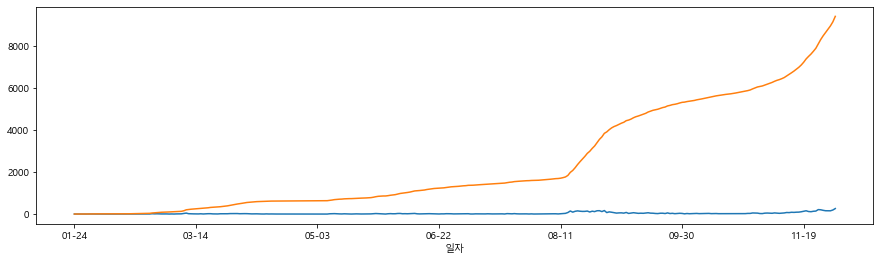

In [89]:
df_g["확진수"].plot()
df_g["누적확진"].plot(figsize=(15, 4))

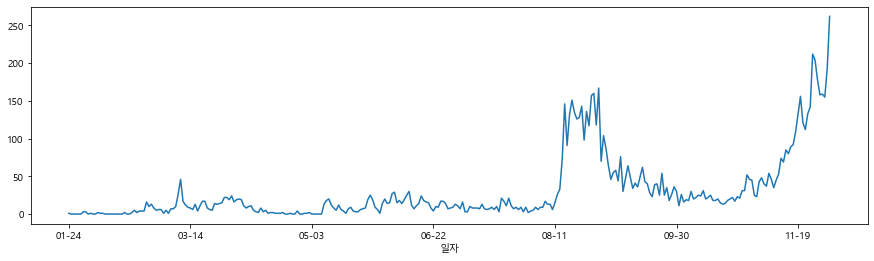

In [90]:
df_g["확진수"].plot(figsize=(15, 4))

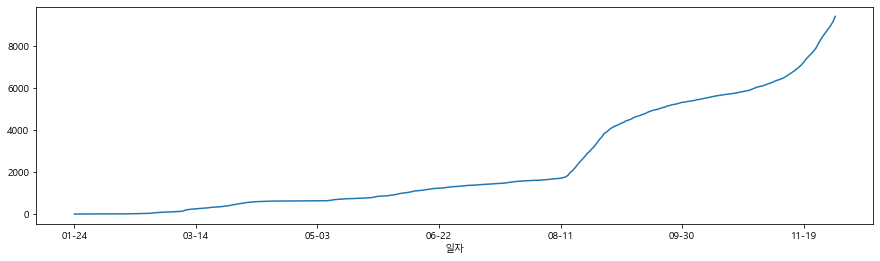

In [91]:
df_g["누적확진"].plot(figsize=(15, 4))

In [92]:
import numpy as np

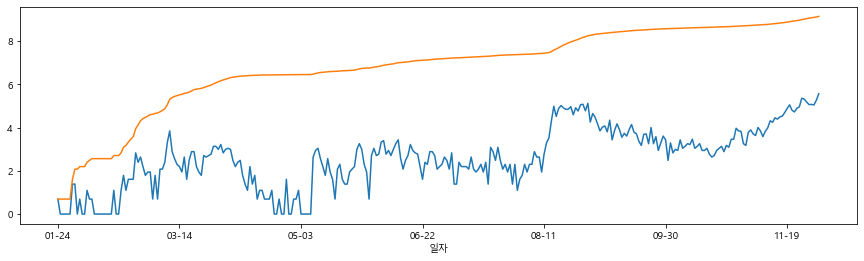

In [93]:
np.log(df_g["확진수"] + 1).plot()
np.log(df_g["누적확진"] + 1).plot(figsize=(15, 4))

In [94]:
df["요일"] = df["확진일자"].dt.dayofweek
df[["확진일자", "요일"]].head()

,확진일자,요일
0,2020-12-02,2
1,2020-12-02,2
2,2020-12-02,2
3,2020-12-02,2
4,2020-12-02,2


In [95]:
weekday_name = "월 화 수 목 금 토 일"
weekday_name = weekday_name.split()
weekday_name

['월', '화', '수', '목', '금', '토', '일']

In [96]:
df["요일명"] = df["요일"].map(lambda x :weekday_name[x])
df[["확진일자", "요일", "요일명"]].head()

,확진일자,요일,요일명
0,2020-12-02,2,수
1,2020-12-02,2,수
2,2020-12-02,2,수
3,2020-12-02,2,수
4,2020-12-02,2,수


In [97]:
g = df.groupby(["월", "요일명"])["연번"].count()
g.index

MultiIndex([( 1, '금'),
            ( 1, '목'),
            ( 2, '금'),
            ( 2, '목'),
            ( 2, '수'),
            ( 2, '월'),
            ( 2, '일'),
            ( 2, '토'),
            ( 2, '화'),
            ( 3, '금'),
            ( 3, '목'),
            ( 3, '수'),
            ( 3, '월'),
            ( 3, '일'),
            ( 3, '토'),
            ( 3, '화'),
            ( 4, '금'),
            ( 4, '목'),
            ( 4, '수'),
            ( 4, '월'),
            ( 4, '일'),
            ( 4, '토'),
            ( 4, '화'),
            ( 5, '금'),
            ( 5, '목'),
            ( 5, '수'),
            ( 5, '월'),
            ( 5, '일'),
            ( 5, '토'),
            ( 5, '화'),
            ( 6, '금'),
            ( 6, '목'),
            ( 6, '수'),
            ( 6, '월'),
            ( 6, '일'),
            ( 6, '토'),
            ( 6, '화'),
            ( 7, '금'),
            ( 7, '목'),
            ( 7, '수'),
            ( 7, '월'),
            ( 7, '일'),
            ( 7, '토'),
           

In [98]:
g = g.unstack()
g = g.fillna(0).astype(int)
g = g[weekday_name]
g

요일명,월,화,수,목,금,토,일
월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,289,327,328,336,473,277
9,177,242,228,207,169,155,126


In [99]:
g.style.background_gradient(cmap="Greens")

요일명,월,화,수,목,금,토,일
월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,289,327,328,336,473,277
9,177,242,228,207,169,155,126


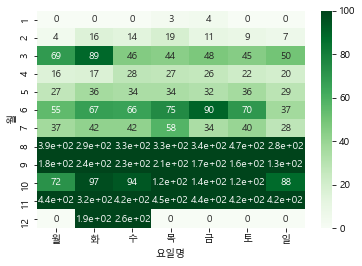

In [100]:
import seaborn as sns
sns.heatmap(g, cmap="Greens", annot=True, vmax=100)

In [101]:
gu_count = df["거주지"].value_counts()

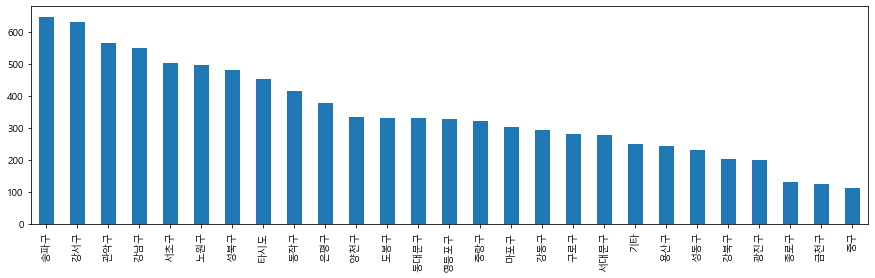

In [102]:
gu_count.plot.bar(figsize=(15, 4), rot=90)

In [103]:
seoul_gu = gu_count.head(25).index
seoul_gu

Index(['송파구', '강서구', '관악구', '강남구', '서초구', '노원구', '성북구', '타시도', '동작구', '은평구',
       '양천구', '도봉구', '동대문구', '영등포구', '중랑구', '마포구', '강동구', '구로구', '서대문구', '기타',
       '용산구', '성동구', '강북구', '광진구', '종로구'],
      dtype='object')

In [104]:
df[~df["거주지"].isin(seoul_gu)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주,월일,요일,요일명
369,199052,34886,12.01.,중구,-,감염경로 조사중,NaN,NaN,2020-12-01,12,49,12-01,1,화
426,198995,34703,12.01.,중구,-,감염경로 조사중,NaN,NaN,2020-12-01,12,49,12-01,1,화
451,198970,34878,12.01.,중구,-,강남구 연기학원 관련,NaN,NaN,2020-12-01,12,49,12-01,1,화
483,198938,34525,11.30.,중구,-,기타 확진자 접촉,NaN,NaN,2020-11-30,11,49,11-30,0,월
561,198860,34328,11.30.,금천구,-,영등포구 학원 관련,NaN,NaN,2020-11-30,11,49,11-30,0,월
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9195,19226,7925,3.12.,금천구,-,콜센터직원 접촉,퇴원,NaN,2020-03-12,3,11,03-12,3,목
9234,19187,7637,3.10.,금천구,-,구로구 콜센터 관련,퇴원,NaN,2020-03-10,3,11,03-10,1,화
9284,19137,7463,3.9.,금천구,-,구로구 콜센터 관련,퇴원,NaN,2020-03-09,3,11,03-09,0,월
9285,19136,7461,3.9.,중구,-,구로구 콜센터 관련,퇴원,NaN,2020-03-09,3,11,03-09,0,월


In [105]:
df["지역"] = df["거주지"]
df.head(1)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주,월일,요일,요일명,지역
0,199421,35695,12.02.,중랑구,-,노원구 의료기관 관련,NaN,NaN,2020-12-02,12,49,12-02,2,수,중랑구


In [106]:
df.loc[~df["거주지"].isin(seoul_gu), "지역"] = "타지역"

In [107]:
df["지역"] = df["거주지"].map(lambda x : x if x in seoul_gu else "타지역")
df.tail(1)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주,월일,요일,요일명,지역
9420,191,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원,NaN,2020-01-24,1,4,01-24,4,금,강서구


In [108]:
def find_seoul_gu(x):
    if x in seoul_gu:
        return x
    else:
        return "타지역"

In [109]:
df["지역"] = df["거주지"].apply(find_seoul_gu)

In [110]:
df["지역"] = df["거주지"].map(find_seoul_gu)

In [111]:
df.loc[df["지역"] == "타지역", "거주지"].unique()

array(['중구', '금천구'], dtype=object)

In [112]:
seoul_gu_count = df["지역"].value_counts()

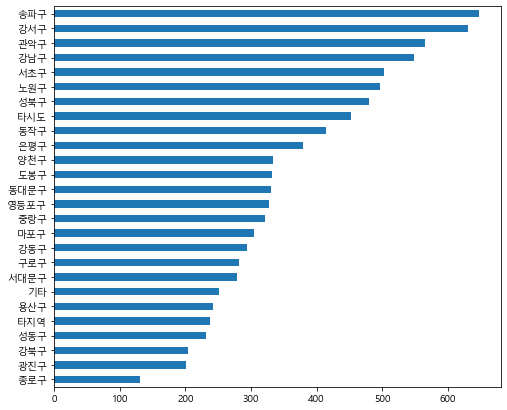

In [113]:
seoul_gu_count.sort_values().plot.barh(figsize=(8, 7))

In [114]:
df["접촉력"].value_counts().head(10)

기타 확진자 접촉        1769
감염경로 조사중         1033
성북구 사랑제일교회 관련     641
확인 중              586
타시도 확진자 접촉        411
해외 접촉 추정          404
강서구 댄스교습관련 시설     171
이태원 클럽 관련         139
8.15서울도심집회        126
리치웨이 관련           119
Name: 접촉력, dtype: int64

In [115]:
df["접촉력"].value_counts(normalize=True).head(10) * 100

기타 확진자 접촉        18.777200
감염경로 조사중         10.964866
성북구 사랑제일교회 관련     6.803949
확인 중              6.220146
타시도 확진자 접촉        4.362594
해외 접촉 추정          4.288292
강서구 댄스교습관련 시설     1.815094
이태원 클럽 관련         1.475427
8.15서울도심집회        1.337438
리치웨이 관련           1.263136
Name: 접촉력, dtype: float64

In [116]:
df["접촉력"].unique()

array(['노원구 의료기관 관련', '기타 확진자 접촉', '타시도 확진자 접촉', '감염경로 조사중',
       '강남구 소재 콜센터 관련', '강서구 소재 병원관련(11월)', '동대문구 지혜병원 관련',
       '마포구 홈쇼핑회사 관련', '강서구 댄스교습관련 시설', '해외 유입', '중랑구 실내 체육시설 Ⅱ 관련',
       '여의도 순복음교회 관련', '강남구 어학원 관련Ⅰ', '강서구 소재 댄스교습시설 연관 병원',
       '고려대학교 밴드동아리', '소규모 지인모임', '구로구 소재 고등학교 관련', '강남구 어학원 관련Ⅱ',
       '송파구 사우나 관련', '서초구 사우나Ⅱ 관련', '어플소모임 관련', '서초구 사우나 관련',
       '동대문구 고등학교 관련', '춘천 연탄봉사모임 관련', '동작구 교회 기도처 관련', '노원구 소재 회사 관련',
       '영등포구 학원 관련', '영등포구 회사 관련', '도봉구 청련사 관련', '강남구 연기학원 관련',
       '노원구 체육시설 관련', '송파구 잠언의료기(강남구 CJ텔레닉스) 관련', '저축 금융컨설팅 관련',
       '성동구 소재 PC방 관련', '강남구 콜센터 관련', '중구 소재 판매시설 관련', '수도권산악회(11월) 관련 ',
       '강서구 경로당 관련', '중구 성00 관련', '성동구 체육시설 관련', '동대문구 체육시설 관련',
       '서초구 건설회사 관련', '동작구 임용단기고시 관련', '마포구 홍대새교회 관련', '강서구 가족 관련',
       '동창 운동 모임 관련', '노원구 가족관련', '노원구청 관련', '강서구 소재 병원Ⅲ 관련',
       '중구 제조업공장 관련', '연세대 학생 관련', '서대문구 요양시설 관련', '구로구 고등학교 관련',
       '마포구 소재 노인복지시설 관련', '강남구 음식점Ⅱ 관련', '삼성서울병원 관련', '지인-가족전파',
       '중구 소재 보람상조

In [117]:
df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [118]:
df.loc[df["접촉력"].str.contains("확인"), "접촉력"] = "확인 중"

In [119]:
df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중'], dtype=object)

In [120]:
contact_count = df["접촉력"].value_counts()
contact_count

기타 확진자 접촉        1769
감염경로 조사중         1033
성북구 사랑제일교회 관련     641
확인 중              628
타시도 확진자 접촉        411
                 ... 
#10377 접촉           1
#83 접촉              1
부동산 중개업 관련          1
#7500 접촉(추정)        1
#8079 접촉            1
Name: 접촉력, Length: 424, dtype: int64

In [121]:
df["접촉력"].value_counts(normalize=True).head(15) * 100 

기타 확진자 접촉            18.777200
감염경로 조사중             10.964866
성북구 사랑제일교회 관련         6.803949
확인 중                  6.665959
타시도 확진자 접촉            4.362594
해외 접촉 추정              4.288292
강서구 댄스교습관련 시설         1.815094
이태원 클럽 관련             1.475427
8.15서울도심집회            1.337438
리치웨이 관련               1.263136
해외 유입                 1.241906
서초구 사우나Ⅱ 관련           0.753635
동대문구 에이스희망케어센터 관련     0.753635
서초구 사우나 관련            0.743021
도봉구 다나병원              0.721792
Name: 접촉력, dtype: float64

In [122]:
contact_count.head(15)

기타 확진자 접촉            1769
감염경로 조사중             1033
성북구 사랑제일교회 관련         641
확인 중                  628
타시도 확진자 접촉            411
해외 접촉 추정              404
강서구 댄스교습관련 시설         171
이태원 클럽 관련             139
8.15서울도심집회            126
리치웨이 관련               119
해외 유입                 117
서초구 사우나Ⅱ 관련            71
동대문구 에이스희망케어센터 관련      71
서초구 사우나 관련             70
도봉구 다나병원               68
Name: 접촉력, dtype: int64

In [123]:
top_contact = contact_count.head(15).index
top_contact

Index(['기타 확진자 접촉', '감염경로 조사중', '성북구 사랑제일교회 관련', '확인 중', '타시도 확진자 접촉',
       '해외 접촉 추정', '강서구 댄스교습관련 시설', '이태원 클럽 관련', '8.15서울도심집회', '리치웨이 관련',
       '해외 유입', '서초구 사우나Ⅱ 관련', '동대문구 에이스희망케어센터 관련', '서초구 사우나 관련', '도봉구 다나병원'],
      dtype='object')

In [124]:
df_top_contact = df[df["접촉력"].isin(top_contact)]

In [125]:
contact_group = df_top_contact.groupby(["접촉력", "월"])["연번"].count().unstack()
contact_group = contact_group.fillna(0).astype(int)
contact_group = contact_group.sort_values(by=[5, 6, 3, 4, 7, 3], ascending=False)
contact_group.style.background_gradient()

월,2,3,4,5,6,7,8,9,10,11,12
접촉력,,,,,,,,,,,
이태원 클럽 관련,0,0,0,133,6,0,0,0,0,0,0
해외 접촉 추정,1,121,112,24,23,39,47,23,14,0,0
확인 중,10,28,9,12,75,49,444,1,0,0,0
타시도 확진자 접촉,5,17,4,2,6,16,92,76,34,128,31
리치웨이 관련,0,0,0,0,119,0,0,0,0,0,0
기타 확진자 접촉,0,0,0,0,0,1,422,309,116,730,191
8.15서울도심집회,0,0,0,0,0,0,113,13,0,0,0
감염경로 조사중,0,0,0,0,0,0,11,284,125,511,102
강서구 댄스교습관련 시설,0,0,0,0,0,0,0,0,0,168,3


In [126]:
contact_group.loc[['해외 접촉 추정', '확인 중']]

월,2,3,4,5,6,7,8,9,10,11,12
접촉력,,,,,,,,,,,
해외 접촉 추정,1,121,112,24,23,39,47,23,14,0,0
확인 중,10,28,9,12,75,49,444,1,0,0,0


In [127]:
df_unknown = df[df["접촉력"] == "확인 중"].copy()
df_unknown.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주,월일,요일,요일명,지역
5463,193958,20163,8.31.,양천구,-,확인 중,퇴원,NaN,2020-08-31,8,36,08-31,0,월,양천구
5464,193957,20141,8.31.,은평구,-,확인 중,퇴원,NaN,2020-08-31,8,36,08-31,0,월,은평구
5465,193956,20159,8.31.,용산구,-,확인 중,퇴원,NaN,2020-08-31,8,36,08-31,0,월,용산구
5469,193952,20130,8.31.,도봉구,-,확인 중,퇴원,NaN,2020-08-31,8,36,08-31,0,월,도봉구
5475,193946,20039,8.31.,타시도,-,확인 중,퇴원,NaN,2020-08-31,8,36,08-31,0,월,타시도


In [128]:
df_unknown.shape

(628, 15)

In [129]:
all_weekly_case = df["주"].value_counts()
all_weekly_case.head()

48    1186
35     925
34     913
47     811
49     610
Name: 주, dtype: int64

In [130]:
unknown_weekly_case = df_unknown["주"].value_counts()
unknown_weekly_case.head()

35    224
34    170
24     25
33     25
23     18
Name: 주, dtype: int64

In [131]:
all_unknown = pd.DataFrame({"주별 확진" : all_weekly_case, 
                            "감염경로 불명 확진": unknown_weekly_case})
all_unknown = all_unknown.fillna(0)

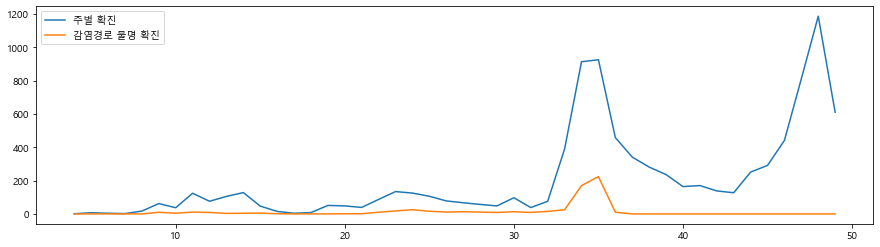

In [132]:
all_unknown.plot(figsize=(15, 4))

In [133]:
all_unknown["확인중 비율"] = (all_unknown["감염경로 불명 확진"] / all_unknown["주별 확진"]) * 100
all_unknown.sort_values(by="확인중 비율", ascending=False).head(10)

,주별 확진,감염경로 불명 확진,확인중 비율
35,925,224.0,24.216216
31,38,9.0,23.684211
24,125,25.0,20.000000
32,76,15.0,19.736842
27,67,13.0,19.402985
28,57,11.0,19.298246
29,48,9.0,18.750000
34,913,170.0,18.619934
9,62,10.0,16.129032
25,106,16.0,15.094340


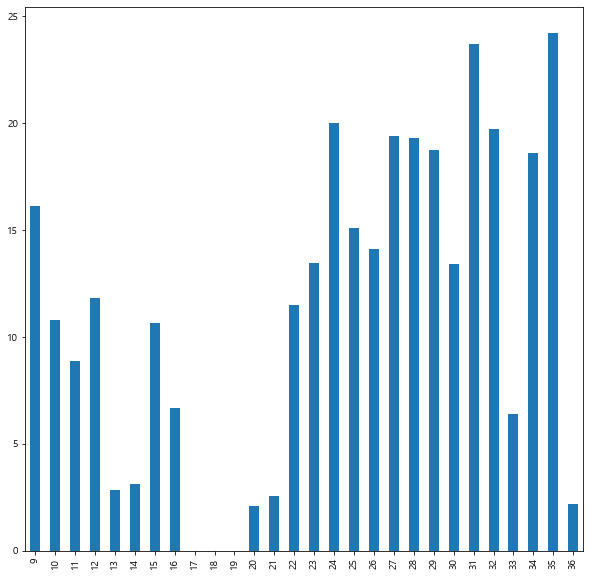

In [134]:
all_unknown['확인중 비율'][5:33].plot.bar(figsize=(10,10))

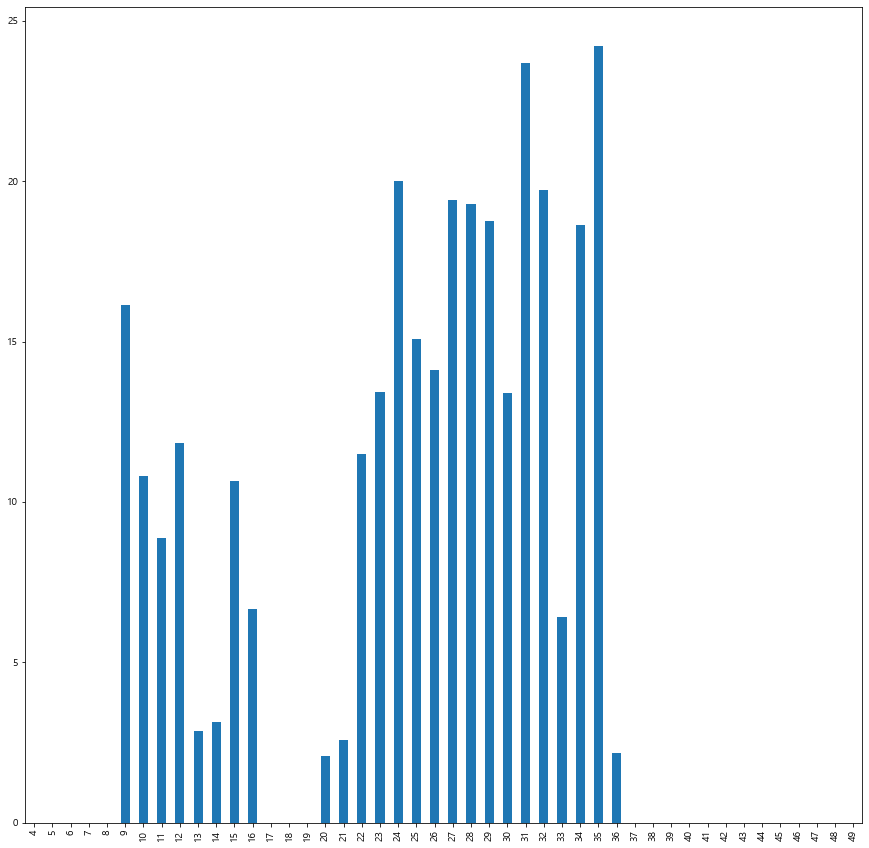

In [135]:
all_unknown['확인중 비율'].plot.bar(figsize=(15,15))

In [136]:
w = pd.DataFrame(df)
w.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주,월일,요일,요일명,지역
0,199421,35695,12.02.,중랑구,-,노원구 의료기관 관련,NaN,NaN,2020-12-02,12,49,12-02,2,수,중랑구
1,199420,35335,12.02.,서대문구,-,기타 확진자 접촉,NaN,NaN,2020-12-02,12,49,12-02,2,수,서대문구
2,199419,35658,12.02.,광진구,-,타시도 확진자 접촉,NaN,NaN,2020-12-02,12,49,12-02,2,수,광진구
3,199418,35667,12.02.,광진구,-,타시도 확진자 접촉,NaN,NaN,2020-12-02,12,49,12-02,2,수,광진구
4,199417,35665,12.02.,광진구,-,감염경로 조사중,NaN,NaN,2020-12-02,12,49,12-02,2,수,광진구
